# **Import Libraies**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Titanic dataset**

In [2]:
df = sns.load_dataset("titanic")



# **Basic Info**

In [3]:
print("Shape of Data:", df.shape)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())



Shape of Data: (891, 15)
Data Types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Duplicate Rows: 107


# **Drop duplicates**

In [4]:
df = df.drop_duplicates()

# ** Convert 'age' to numeric just in case (not needed here but good practice)**


In [5]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')



# **Show statistics of numerical columns**


In [6]:
print("\n🔹 Age and Fare Statistics:\n", df[['age', 'fare']].describe())




🔹 Age and Fare Statistics:
               age        fare
count  678.000000  784.000000
mean    29.869351   34.711740
std     14.759076   52.160151
min      0.420000    0.000000
25%     20.000000    8.050000
50%     28.250000   15.900000
75%     39.000000   34.109350
max     80.000000  512.329200


# **Count plot: Survival by class**


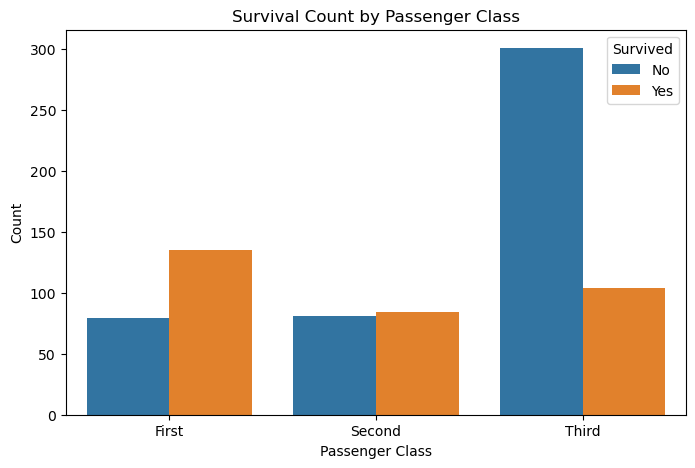

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='class', hue='survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# **Histogram: Age distribution**


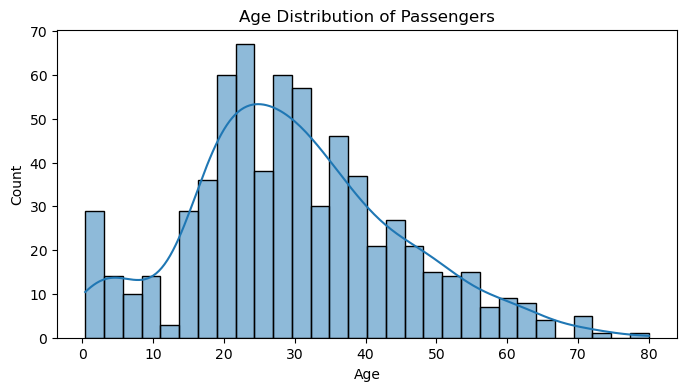

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.show()


# **Boxplot: Fare distribution by class**


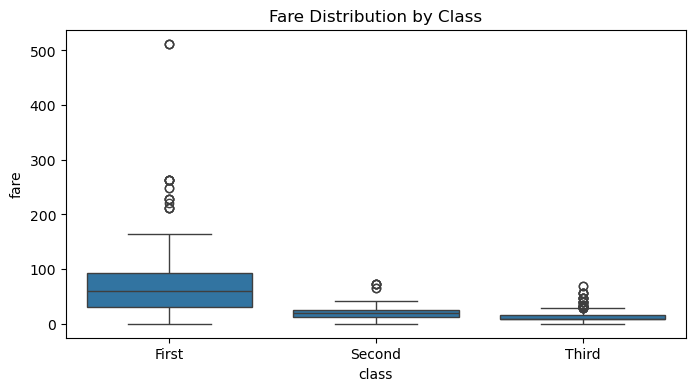

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='class', y='fare', data=df)
plt.title("Fare Distribution by Class")
plt.show()


# ** Top 10 Embarked locations (in Titanic it's usually 3: S, C, Q)**


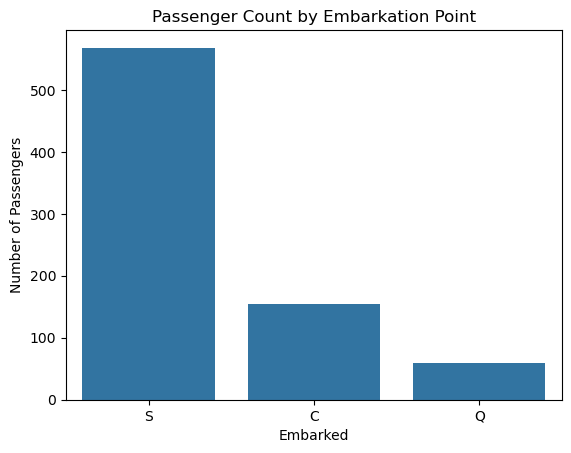

In [10]:
embarked_counts = df['embarked'].value_counts()
sns.barplot(x=embarked_counts.index, y=embarked_counts.values)
plt.title("Passenger Count by Embarkation Point")
plt.xlabel("Embarked")
plt.ylabel("Number of Passengers")
plt.show()


# **Monthly plot: Instead, let's use age groups and analyze survival**


C:\Users\DELL INSPIRON\AppData\Local\Temp\ipykernel_7848\34560601.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('age_group')['survived'].mean()


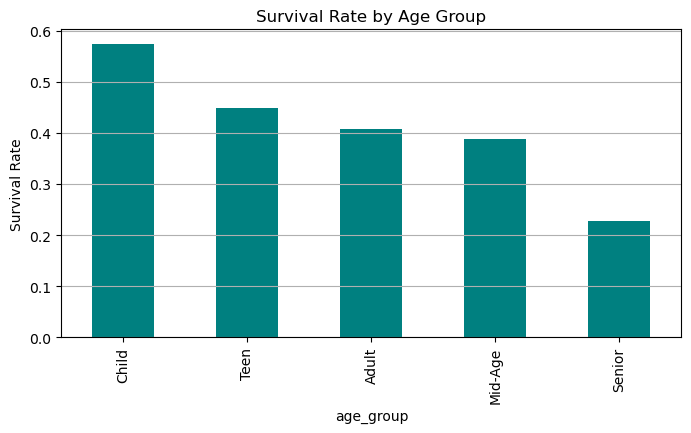

In [12]:
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 40, 60, 100],
                         labels=['Child', 'Teen', 'Adult', 'Mid-Age', 'Senior'])

age_survival = df.groupby('age_group')['survived'].mean()
age_survival.plot(kind='bar', figsize=(8, 4), title="Survival Rate by Age Group", color='teal')
plt.ylabel("Survival Rate")
plt.grid(axis='y')
plt.show()



# **Correlation**


In [13]:
print("\n🔍 Correlation Matrix:")
print(df[['age', 'fare', 'survived', 'pclass']].corr())



🔍 Correlation Matrix:
               age      fare  survived    pclass
age       1.000000  0.092707 -0.086548 -0.369361
fare      0.092707  1.000000  0.246769 -0.549216
survived -0.086548  0.246769  1.000000 -0.332658
pclass   -0.369361 -0.549216 -0.332658  1.000000
